Goal:
Use data to find the three types of Halloween candy that will make you the most popular house on the block.
Approach:
View the data in Python
Apply PCA to the data to create a scatter plot in Python
Identify clusters and filter the data down to three candies in Tableau

1. View the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("candy-data.csv")
data.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
subset = data.iloc[:,1:-3]
subset.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


2. Apply Principal COmponent Analysis(PCA)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components = 2)   # to turn 9 column data into 2 columns

In [6]:
pca.fit(subset)

PCA(n_components=2)

In [7]:
pca.explained_variance_ratio_

array([0.45736631, 0.15454393])

In [8]:
# 0.45736631 + 0.15454393

In [9]:
#  Thw 2 new columns created out of the the nine columns capture about 60% information in my original nine columns
# means that these two columns are a decent representatio  of those nine columns

In [10]:
candy_2d = pd.DataFrame(pca.transform(subset))
candy_2d.head()

,0,1
0,1.305021,-0.335978
1,1.123628,-0.294698
2,0.034733,-0.204088
3,0.034733,-0.204088
4,-0.469043,-0.565369


<Axes: xlabel='0', ylabel='1'>

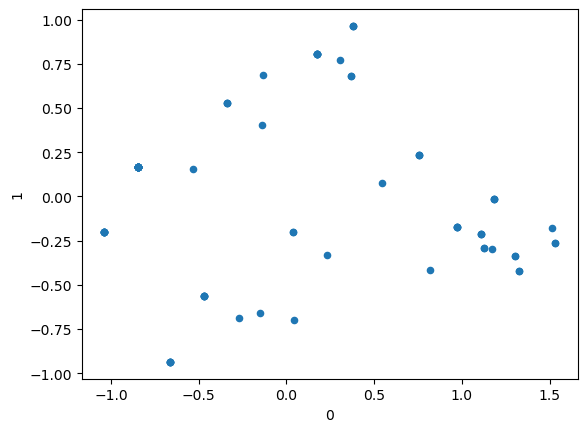

In [11]:
candy_2d.plot(kind = 'scatter', x = 0, y = 1)

In [12]:
# there are some dots sitting below other

In [13]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [14]:
 import numpy as np

In [15]:
# data['x_jitter'] = candy_2d[0] + np.random.randn(85)    # for 85 candies
# data['y_jitter'] = candy_2d[1] + np.random.randn[85]
# data.plot(kind = 'scatter', x = 'x_jitter', y = 'y_jitter')

<Axes: xlabel='x_jitter', ylabel='y_jitter'>

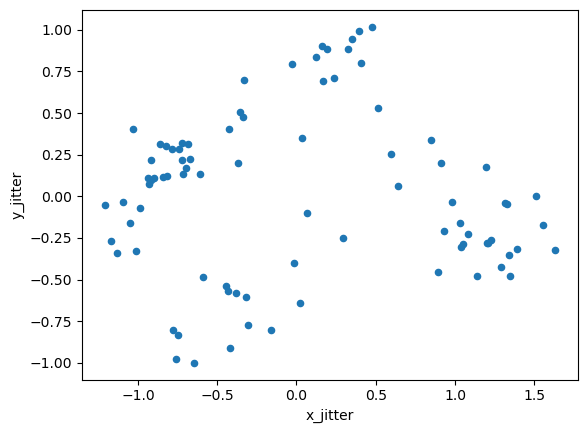

In [16]:
data['x_jitter'] = candy_2d.loc[:, 0] + np.random.randn(85)*.1
data['y_jitter'] = candy_2d.loc[:, 1] + np.random.randn(85)*.1
data.plot(kind = 'scatter', x = 'x_jitter', y = 'y_jitter')

In [17]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,x_jitter,y_jitter
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1.391684,-0.314038
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.203449,-0.278312
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.063438,-0.098903
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,-0.015357,-0.399034
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,-0.379726,-0.580629


In [18]:
data.to_csv('candy_data_pca.csv')